In [91]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

In [92]:
arcene_train = pd.read_csv("./data/ARCENE/arcene_train.data", sep=" ", header=None).drop([10000], axis=1)
arcene_train_labels = pd.read_csv("./data/ARCENE/arcene_train.labels", sep=" ", header=None)
arcene_valid = pd.read_csv("./data/ARCENE/arcene_valid.data", sep=" ", header=None).drop([10000], axis=1)
arcene_valid_labels = pd.read_csv("./data/arcene_valid.labels", sep=" ", header=None)

In [93]:
print(arcene_train)

    0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      0    71     0    95     0   538   404    20     0     0  ...   255   
1      0    41    82   165    60   554   379     0    71     0  ...   213   
2      0     0     1    40     0   451   402     0     0     0  ...   235   
3      0    56    44   275    14   511   470     0     0     0  ...    91   
4    105     0   141   348     0   268   329     0     0     1  ...   813   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95    24    26     0   461     0   545     0    17   159   177  ...   275   
96    40     0     0   419    71   502     0    39    93   163  ...   277   
97     2    15    48   677     0   434   442     0    43     0  ...   211   
98     8     0    38   205    69   419   454     0   113     3  ...   193   
99     0     0     0   148     0   583     0     6   130   112  ...   271   

    9991  9992  9993  9994  9995  9996  9997  9998  9999  
0    570    86  

In [94]:
arcene_valid_labels = arcene_valid_labels.replace({1: True, -1: False})

arcene_train_labels = arcene_train_labels.replace({1: True, -1: False})

arcene_train_labels

,0
0,True
1,False
2,True
3,True
4,False
...,...
95,False
96,False
97,True
98,False


In [95]:
arcene_train_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)

print(arcene_train_concatinated)

    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...   

    9991   9992   9993   99

       0  count
0  False     56
1   True     44


<Axes: xlabel='0', ylabel='count'>

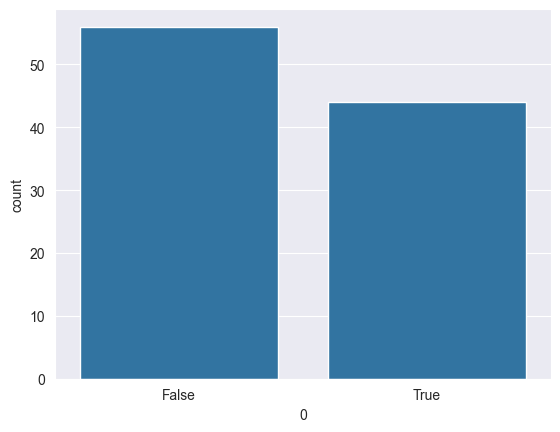

In [96]:
xx = arcene_train_labels[0].value_counts().reset_index()
print(xx)
sns.barplot(x=0, y='count', data=xx)

In [97]:
# # Naive Bayes On The Iris Dataset
# 
# # Convert string column to float
# def str_column_to_float(dataset, column):
# 	for row in dataset:
# 		row[column] = float(row[column].strip())
# 
# # Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup
# 
# # Split a dataset into k folds
# def cross_validation_split(dataset, n_folds):
# 	dataset_split = list()
# 	dataset_copy = list(dataset)
# 	fold_size = int(len(dataset) / n_folds)
# 	for _ in range(n_folds):
# 		fold = list()
# 		while len(fold) < fold_size:
# 			index = randrange(len(dataset_copy))
# 			fold.append(dataset_copy.pop(index))
# 		dataset_split.append(fold)
# 	return dataset_split
# 
# # Calculate accuracy percentage
# def accuracy_metric(actual, predicted):
# 	correct = 0
# 	for i in range(len(actual)):
# 		if actual[i] == predicted[i]:
# 			correct += 1
# 	return correct / float(len(actual)) * 100.0
# 
# # Evaluate an algorithm using a cross validation split
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
# 	folds = cross_validation_split(dataset, n_folds)
# 	scores = list()
# 	for fold in folds:
# 		train_set = list(folds)
# 		train_set.remove(fold)
# 		train_set = sum(train_set, [])
# 		test_set = list()
# 		for row in fold:
# 			row_copy = list(row)
# 			test_set.append(row_copy)
# 			row_copy[-1] = None
# 		predicted = algorithm(train_set, test_set, *args)
# 		actual = [row[-1] for row in fold]
# 		accuracy = accuracy_metric(actual, predicted)
# 		scores.append(accuracy)
# 	return scores
# 
# # Split the dataset by class values, returns a dictionary
# def separate_by_class(dataset):
# 	separated = dict()
# 	for i in range(len(dataset)):
# 		vector = dataset[i]
# 		class_value = vector[-1]
# 		if (class_value not in separated):
# 			separated[class_value] = list()
# 		separated[class_value].append(vector)
# 	return separated
# 
# # Calculate the mean of a list of numbers
# def mean(numbers):
# 	return sum(numbers)/float(len(numbers))
# 
# # Calculate the standard deviation of a list of numbers
# def stdev(numbers):
# 	avg = mean(numbers)
# 	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
# 	return sqrt(variance)
# 
# # Calculate the mean, stdev and count for each column in a dataset
# def summarize_dataset(dataset):
# 	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
# 	del(summaries[-1])
# 	return summaries
# 
# # Split dataset by class then calculate statistics for each row
# def summarize_by_class(dataset):
# 	separated = separate_by_class(dataset)
# 	summaries = dict()
# 	for class_value, rows in separated.items():
# 		summaries[class_value] = summarize_dataset(rows)
# 	return summaries
# 
# # Calculate the Gaussian probability distribution function for x
# def calculate_probability(x, mean, stdev):
# 	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
# 	return (1 / (sqrt(2 * pi) * stdev)) * exponent
# 
# # Calculate the probabilities of predicting each class for a given row
# def calculate_class_probabilities(summaries, row):
# 	total_rows = sum([summaries[label][0][2] for label in summaries])
# 	probabilities = dict()
# 	for class_value, class_summaries in summaries.items():
# 		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
# 		for i in range(len(class_summaries)):
# 			mean, stdev, _ = class_summaries[i]
# 			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
# 	return probabilities
# 
# # Predict the class for a given row
# def predict(summaries, row):
# 	probabilities = calculate_class_probabilities(summaries, row)
# 	best_label, best_prob = None, -1
# 	for class_value, probability in probabilities.items():
# 		if best_label is None or probability > best_prob:
# 			best_prob = probability
# 			best_label = class_value
# 	return best_label
# 
# # Naive Bayes Algorithm
# def naive_bayes(train, test):
# 	summarize = summarize_by_class(train)
# 	predictions = list()
# 	for row in test:
# 		output = predict(summarize, row)
# 		predictions.append(output)
# 	return(predictions)

In [98]:
# model = summarize_by_class(arcene_train_concatinated)

In [99]:
mean_dataSet = arcene_train_concatinated.groupby(10000).mean()
std_dataSet = arcene_train_concatinated.groupby(10000).std()
print(mean_dataSet)
print(std_dataSet)

            0          1          2           3          4           5     \
10000                                                                       
False  37.964286  32.607143  50.517857  329.125000  25.839286  415.821429   
True   35.909091  38.795455  64.113636  330.795455   6.000000  407.340909   

             6         7          8          9     ...        9990  \
10000                                              ...               
False  176.553571  7.071429  60.178571  93.232143  ...  357.589286   
True   303.318182  5.795455  32.886364  26.090909  ...  371.659091   

             9991       9992       9993        9994        9995        9996  \
10000                                                                         
False  396.125000  49.767857  22.928571  112.785714  179.107143  194.910714   
True   396.931818  41.022727  12.204545   97.522727  147.840909  201.136364   

           9997        9998        9999  
10000                                    
False  0.

In [100]:
nbresParClass = arcene_train_concatinated[10000].value_counts()
probApriori = {label: float(nbresParClass[label]) / arcene_train_concatinated.shape[0] for label in arcene_train_concatinated[10000].unique()}
probApriori

{True: 0.44, False: 0.56}

In [130]:
arcene_valid_concatinated = pd.concat([arcene_valid, arcene_valid_labels], axis=1, ignore_index=True)

In [131]:
print(arcene_valid_concatinated)

    0      1      2      3      4      5      6      7      8      9      ...  \
0       0      0    156    138      2    635    444      0      1      0  ...   
1       0      7      0      7      0    251      0      0     22    222  ...   
2       0     32      0    470     53    493      0      0    140    147  ...   
3       0     77      0    202      0    432    472      0     60      0  ...   
4       0     34    102    522      2    474    473      0     39      0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     73      0    436     92    400      0      0    139    261  ...   
96     11     58     50    332    109    393    122      0     75    134  ...   
97     93     32    137    319      0    264    231     21      0      0  ...   
98    119     12    198    339      0    289    410      0      0      4  ...   
99    112     19    171    334      0    282    208      0      0      0  ...   

    9991   9992   9993   99

In [138]:
# Des fonctions
# P(xi/wj)
def p_xi_wj(xi, wj, attrib):
    mean = mean_dataSet.loc[wj, attrib]
    std = std_dataSet.loc[wj, attrib]
    epsilon = 1e-10  # Small constant to avoid division by zero
    return stats.norm.pdf(xi, loc=mean, scale=std + epsilon)


# P(X/wj) * P(wj)
def p_X_wj(exemple, wj):
	prob = probApriori[wj]
	for attrib, valeur in exemple.items():
		print(f'P({attrib}={valeur}|{wj}) = {p_xi_wj(valeur, wj, attrib)}')
		prob *= p_xi_wj(valeur, wj, attrib)
	return round(prob, 15)

In [139]:
print(p_X_wj(arcene_valid_concatinated[0], True))

print(p_X_wj(arcene_valid_concatinated[0], False))

P(0=0|True) = 0.006494177280719141
P(1=0|True) = 0.006157870346172801
P(2=0|True) = 0.0037135678776850562
P(3=0|True) = 0.0003503424438426723
P(4=0|True) = 0.02147439431683984
P(5=89|True) = 4.539313083680255e-05
P(6=28|True) = 0.0006948863011748524
P(7=0|True) = 0.027954742639359747
P(8=0|True) = 0.006302644577019169
P(9=109|True) = 0.001972783610129914
P(10=0|True) = 0.006164003792132489
P(11=4|True) = 0.06645118574171066
P(12=89|True) = 0.0025980618475903443
P(13=115|True) = 1.3101169219509898e-12
P(14=0|True) = 9.649409116700201e-07
P(15=10|True) = 0.00598550979063676
P(16=46|True) = 2.4944902649843307e-09
P(17=0|True) = 0.3737689318588722
P(18=0|True) = 0.0011376889462591932
P(19=21|True) = 0.016550419674576433
P(20=0|True) = 0.02885215312696428
P(21=5|True) = 0.01064569093533009
P(22=0|True) = 0.014875709043819829
P(23=0|True) = 0.014578627227324916
P(24=127|True) = 0.004465290516934301
P(25=0|True) = 0.0002839725732712411
P(26=35|True) = 0.009977453616335862
P(27=0|True) = 0.001

In [129]:
labels = arcene_train_concatinated[10000].unique()

# Extraire les colonnes sans classes
data = arcene_valid_concatinated.drop([10000], axis=1)

total_prob = 0

arcene_valid_concatinated['classe calculée'] = np.nan
for i in range(len(labels)):
	arcene_valid_concatinated[labels[i]] = np.nan
# Faire pour chaque exemple test
for index, row in data.iterrows():
	print(f'Exemple {index}: {row} | {labels}')
	probCond = [p_X_wj(row, label) for label in labels]
	print(f'Individual probabilities: {probCond}')
	total_prob = sum(probCond)
	print(total_prob)
	arcene_valid_concatinated.loc[index, 'classe calculée'] = labels[probCond.index(max(probCond))]
	for i in range(len(labels)):
		if probCond[i] == max(probCond):
			arcene_valid_concatinated.loc[index, labels[i]] = probCond[i] / total_prob
		else:
			arcene_valid_concatinated.loc[index, labels[i]] = 0

Exemple 0: 0         0
1         0
2       156
3       138
4         2
       ... 
9995     67
9996     87
9997      0
9998      0
9999    465
Name: 0, Length: 10000, dtype: int64 | [ True False]
Individual probabilities: [0.0, 0.0]
0.0
Exemple 1: 0         0
1         7
2         0
3         7
4         0
       ... 
9995    201
9996    317
9997      0
9998     34
9999    199
Name: 1, Length: 10000, dtype: int64 | [ True False]


C:\Users\legion\AppData\Local\Temp\ipykernel_20660\2497832759.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  arcene_valid_concatinated.loc[index, 'classe calculée'] = labels[probCond.index(max(probCond))]
C:\Users\legion\AppData\Local\Temp\ipykernel_20660\2497832759.py:21: RuntimeWarning: invalid value encountered in scalar divide
  arcene_valid_concatinated.loc[index, labels[i]] = probCond[i] / total_prob


Individual probabilities: [0.0, 0.0]
0.0
Exemple 2: 0         0
1        32
2         0
3       470
4        53
       ... 
9995    225
9996     53
9997      0
9998     47
9999    219
Name: 2, Length: 10000, dtype: int64 | [ True False]
Individual probabilities: [0.0, 0.0]
0.0
Exemple 3: 0         0
1        77
2         0
3       202
4         0
       ... 
9995      0
9996     71
9997      0
9998    177
9999    487
Name: 3, Length: 10000, dtype: int64 | [ True False]
Individual probabilities: [0.0, 0.0]
0.0
Exemple 4: 0         0
1        34
2       102
3       522
4         2
       ... 
9995      0
9996     74
9997      0
9998      5
9999    416
Name: 4, Length: 10000, dtype: int64 | [ True False]
Individual probabilities: [0.0, 0.0]
0.0
Exemple 5: 0        89
1        31
2       156
3       334
4         0
       ... 
9995    212
9996    345
9997      0
9998    390
9999    356
Name: 5, Length: 10000, dtype: int64 | [ True False]
Individual probabilities: [0.0, 0.0]
0.0
Exemple 6: 

KeyboardInterrupt: 

In [ ]:
print(arcene_valid_concatinated)

In [ ]:
arcene_valid_concatinated = arcene_valid_concatinated.drop([-1], axis=1)
# arcene_valid_concatinated = arcene_valid.fillna(arcene_valid_concatinated.mean())

In [ ]:
print(arcene_valid_concatinated)

In [ ]:
metrics.accuracy_score(arcene_valid_concatinated[10000], arcene_valid_concatinated['classe calculée'])

In [ ]:
cm = metrics.confusion_matrix(arcene_valid_concatinated[10000], arcene_valid_concatinated['classe calculée'])

cm

In [ ]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot()

plt.show()